In [83]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")
import statistics
import math
plt.rcParams.update({'font.size': 13})
plt.rc('ytick', labelsize=13) 
plt.rc('xtick', labelsize=13) 
%matplotlib inline

In [84]:
# scenarioname = "DoubleHydrogenPrice"
# selected_scenarios = ["iteration1", "doubleH2turbine"]
# selected_scenarios = ["EOM2",  "SR_1yearbeforedecommission", "notexpectSR", "expectStableSR"]

# scenarioname = "SR"
# selected_scenarios = ["EOM", "SR1000", "SR1600",  "SR2000M5","SR3000"]

# scenarioname = "NL_CRM"
# selected_scenarios = ["EOM" , "capacity_market_lowerCONE", "capacity_market_higherCONE" , "capacity_subscription_byLOLE","strategic_reserve"] 

# scenarioname = "NL_EOM"
# selected_scenarios = ["NL-EOM_nolifetimeextension", "EOM_5GWNuclear", "EOM_3GWNuclear","EOM_lessDSR","EOM_DSR500"]
# CRM_scenarios = ["NL-EOM_nolifetimeextension", "EOM_5GWNuclear", "EOM_3GWNuclear","EOM_lessDSR","EOM_DSR500"]
# selected_scenarios = ["EOM" , "capacity_market_lowerCONE", "capacity_market_higherCONE" , "capacity_subscription_byLOLE","strategic_reserve"] 

# scenarioname = "NL_CMarketnewData"
# selected_scenarios = ["EOM" , "CM40000", "CM60000","CM60000noRES", "CM60000_DSR150"]
# scenarioname = "NL_CMarketnewData2"
# selected_scenarios = ["EOM" , "CM60000","CM60000noRES"]
# selected_scenarios = ["EOM","SR_M10_P1600", "SR_M15_P1600" , "SR_M20_P1600"]
# scenarioname = "NL_SRnewData"

# selected_scenarios = ["EOM" , "CM40000", "CM60000","CM60000noRES"]
# scenarioname = "NL_CMarketnewData"

# selected_scenarios = ["newEOM" ,"CMnewexpectationFuture"]
# scenarioname = "NL_CM_newexpectationFuture"

# scenarioname ="NL_S1"
# selected_scenarios = ["EOM", "EOM_S1","CM60000_S1", "SR1600_S1"]

# selected_scenarios = ["EOM_lessNuc","SRM10" ,  "SRM15", "SRM20"]
# SCENARIOS = [ "NL-SRM10-lessNuc",  "NL-SR1600M10NONUCLEAR-lessNuc"]
# scenarioname = "NL_interest_comparison"
# selected_scenarios = ["oldinterests","annnuity", "noannuity", "higherrates", "EOM_moreDSR"]
# scenarioname = "NL_lifeextension_comparison"
# selected_scenarios = ["EOM_nolifetimeextension","EOM_lifetimeextension"]
# scenarioname = "NL_Capacity_markets"
# selected_scenarios = ["EOM","CM_bidding_pendingloans", "CM_noVRES", "LTCM_nodownpayments", "CM"]
# scenarioname = "final"
# selected_scenarios = ["EOM","CM", "LTCM", "CS_fix", "CS",  "SR"]

# scenarioname = "ComparisonDSR"
# selected_scenarios = ["EOM","EOM_noDSR"]

# scenarioname = "ComparisonSR"
# selected_scenarios = ["EOM","SR1300", "SR1500", "SR4000"]

# scenarioname = "comparisonfinal2"
# selected_scenarios = ["EOM","CM", "LTCM", "CS_fix", "CS",  "SRy"]
# scenarioname = "comparisonSRyears"
# selected_scenarios = ["EOM", "SR1300",  "SRy_4"] 
# scenarioname = "comparisonCM_VRES"
# selected_scenarios = ["CM", "CM_noVRES"] 
# scenarioname = "comparisonSR4"
# selected_scenarios = ["EOM", "SR143_15", "SR1390_15",  "SR1390_20", "SR1499_15"]
# scenarioname = "comparison_CM_wlowervolume"
# selected_scenarios = ["EOM", "CM_lowerTV", "CM", "LTCM_novres"]
# scenarioname = "comparison_SR_new"
# selected_scenarios = ["SR1390_15", "SR_1390_15_new"]
# name = "SR"

# scenarioname = "comparisonCM3"
# selected_scenarios = ["EOM", "CM_ES_VRES", "CM_ES",  "CM", "LTCM"]  

# scenarioname = "comparisonCM4"
# selected_scenarios = ["EOM", "CM_ES_VRES", "CM_lowVol","LTCM_ES_VRES","LTCM"]  

# scenarioname = "comparisonCS2"
# selected_scenarios = ["CS_fixprice_nochangeVol", "CS_fixprice_changeVol" , "CS_changeprice_nochangeVol", "CS_changeprice_changeVol"]
# scenarioname = "comparisonALL"
# selected_scenarios = ["EOM", "CM", "CS_fixprice_changeVol","SR143_15"]
# scenarioname = "comparisonCS3"
# selected_scenarios = ["EOM", "CS_fixprice_changeVol" ,"CS_fixprice_changeVol_linear", "CS_changeprice_nochangeVol", "CS_changeprice_changeVol"]
scenarioname = "comparisonCS4"
selected_scenarios = [ "EOM", "CS_fixprice_changeVol", "CS_fixprice_changeVol_linear",
                  "CS_changeprice_nochangeVol", "CS_changeprice_changeVol", "CS_no_inertia"]
# name = "SR"
# scenarioname = "comparisonSR_5"
# selected_scenarios = ["SR1390_15","SR_distributed_plants", "SR_distr_plants_acceptnewer"]
name = "All"
name = "CS"
# scenarioname = "comparisonSR_CM_vres_es"
# selected_scenarios = ["CM_ES_VRES","CM_ES_VRES_ungroupedplants", "CM_ES_VRES_ungrouped_distributedplants"]

CRM_scenarios = selected_scenarios
SIMULATION_YEARS = True

In [85]:
selected_scenarios

['EOM',
 'CS_fixprice_changeVol',
 'CS_fixprice_changeVol_linear',
 'CS_changeprice_nochangeVol',
 'CS_changeprice_changeVol',
 'CS_no_inertia']

In [86]:
path_to_results = os.path.join(os.getcwd(), "Scenarios", (scenarioname + ".xlsx"))
path_to_plots = os.path.join(os.getcwd(),  "Scenarios", "Comparison_"+ scenarioname )
if not os.path.exists(path_to_plots):
    os.mkdir(path_to_plots)

In [87]:
technology_colors = {
    'Biomass_CHP_wood_pellets_DH': "green",
    'Biofuel': "green",
    "Biomass_CHP_wood_pellets_PH": "greenyellow",
    'Coal PSC': "black",
    "Fuel oil PGT": "gray",
    'Lignite PSC': "darkgoldenrod",
    'CCGT': "indianred",
    'OCGT': "gray",
    'PV_utility_systems': "gold",
    "Solar PV large": "gold",
    "Solar CSP": "gold",
    'PV': "gold",
    'PV_residential': "khaki",
    'Solar PV rooftop': "khaki",
    'WTG_onshore': "cornflowerblue",
    'Wind Onshore': "cornflowerblue",
    "WTG_offshore": "navy",
    "Wind Offshore": "navy",
    "Nuclear": "mediumorchid",
    "Hydropower_ROR": "aquamarine",
    'Hydropower_reservoir_medium': "darkcyan",
    "Hydropower": "darkcyan",
    "Lithium ion battery 4": "pink",
    "Lithium ion battery": "hotpink",
    "Lithium_ion_battery_charge": "hotpink",
    "Pumped_hydro": "darkcyan",
    "Pumped hydro": "darkcyan",
    "CCGT_CHP_backpressure_DH": "orange",
    "CCGT_CHP_backpressure_PH": "orange",
    "CCS": "orange",
    "fuel_cell": "gold",
    "electrolyzer": "gray",
    "hydrogen turbine": "darkred",
    "hydrogen CCGT": "darkred",
    "hydrogen OCGT": "indianred",
    "hydrogen combined cycle": "coral"
}
others = {
    'Biomass_CHP_wood_pellets_PH': "greenyellow",
    'Coal PSC': "black",
    "Fuel oil PGT": "gray",
    'Lignite PSC': "darkgoldenrod",
    'CCGT': "indianred",
    'OCGT': "darkred",
    "Pumped_hydro": "darkcyan",
    "CCGT_CHP_backpressure_DH": "orange",
    "Nuclear": "mediumorchid",
    "Hydropower_ROR": "aquamarine"
}
technology_names = {
    'Biomass_CHP_wood_pellets_DH': "Biomass",
    "Biomass_CHP_wood_pellets_PH": "Biomass",
    'Hydropower_reservoir_medium': "Hydro",
    'PV_utility_systems': "PV utility systems",
    'PV_residential': "PV residential",
    'WTG_onshore': "Wind onshore",
    "WTG_offshore": "Wind offhore",
    "Lithium_ion_battery": "Lithium battery",
    "Lithium_ion_battery_charge": "Lithium battery charge",
    "Pumped_hydro": "Pumped hydro",
    "CCGT_CHP_backpressure_DH": "CCGT CHP",
    "hydrogen_turbine": "H2 turbine",
}

In [88]:
CostRecovery_data = pd.read_excel(path_to_results, sheet_name='CostRecovery', index_col=0)
LOL_data = pd.read_excel(path_to_results, sheet_name='LOL', index_col=0)
ENS_data = pd.read_excel(path_to_results, sheet_name='ENS', index_col=0)
SupplyRatio_data = pd.read_excel(path_to_results, sheet_name='SupplyRatio', index_col=0)
ElectricityPrices_data = pd.read_excel(path_to_results, sheet_name='ElectricityPrices', index_col=0)
Monthly_ElectricityPrices_data = pd.read_excel(path_to_results, sheet_name='MonthlyElectricityPrices', index_col=0)
ShareRES_data = pd.read_excel(path_to_results, sheet_name='ShareRES', index_col=0)
Last_year_capacity_data = pd.read_excel(path_to_results, sheet_name='last_year_capacity', index_col=0)
InstalledCapacity_data = pd.read_excel(path_to_results, sheet_name='InstalledCapacity', index_col=0)
Info_data = pd.read_excel(path_to_results, sheet_name='Info', index_col=0)
Last_year_prices_data = pd.read_excel(path_to_results, sheet_name='Last_year_pdc', index_col=0)
Invested_capacity_data = pd.read_excel(path_to_results, sheet_name='Invested', index_col=0)
Dismantled_capacity_data = pd.read_excel(path_to_results, sheet_name='Dismantled', index_col=0)
H2Production_data = pd.read_excel(path_to_results, sheet_name='H2Production', index_col=0)
AverageNPVpertechnology = pd.read_excel(path_to_results, sheet_name='AverageNPVpertechnology',  header=[0,1], index_col=0)
AverageProfitswLoans = pd.read_excel(path_to_results, sheet_name='Profits',  header=[0,1], index_col=0)
lifetimeExtension = pd.read_excel(path_to_results, sheet_name='lifeextension',   index_col=0)
median_annual_production = pd.read_excel(path_to_results, sheet_name='median_annual_production',   index_col=0)

In [89]:
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [90]:
LOLvoluntary = pd.read_excel(path_to_results, sheet_name='LOLvoluntary', index_col=0)
subscribed_consumers_data = pd.read_excel(path_to_results, sheet_name='subscribedCons', index_col=0)

In [91]:
# AverageNPVpertechnology.drop(list(range(1,20)), inplace=True)
# AverageProfitswLoans.drop(list(range(1,20)), inplace=True)
# CostRecovery_data.drop(list(range(2050,2070)), inplace=True)
# LOL_data.drop(list(range(2050,2070)), inplace=True)
# ENS_data.drop(list(range(2050,2070)), inplace=True)
# ElectricityPrices_data.drop(list(range(2050,2070)), inplace=True)
# Monthly_ElectricityPrices_data.drop(list(range(0,12*19)), inplace=True)

In [92]:
NPVNewPlants_data = pd.read_excel(path_to_results, sheet_name='overallNPV', index_col=0)
IRRNewPlants_data = pd.read_excel(path_to_results, sheet_name='overallIRR', index_col=0)

In [93]:
InstalledCapacity_data.drop([2046, 2047,2048,2049, 2050], inplace=True)
# InstalledCapacity_data.drop([-4, -3,-2,-1, 0, 40, 41,42,43], inplace=True)

In [94]:
# axs1 = sns.lineplot(data=Coststosociety_data, palette="tab10", linewidth=2.5)
# plt.grid()
# sns.set_style("whitegrid")
# plt.grid()
# plt.xlabel('Years', fontsize='medium')
# plt.ylabel('Eur', fontsize='medium')
# plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
# axs1.set_title('Costs to Society')
# fig1 = axs1.get_figure()
# fig1.savefig(path_to_plots + '/' + 'Costs to Society.png', bbox_inches='tight', dpi=300)

# fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
# ax1.plot(Coststosociety_data)
# #ax1 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5)
# plt.ylabel('Costs to Society (EUR/MWh)', fontsize='large')
# plt.ylim([50, 80])
# ax1.legend(Coststosociety_data.columns.values, bbox_to_anchor=(1, 1.2), fontsize='large')
# ax2.plot(Coststosociety_data)
# #ax2 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5)
# plt.xlabel('Years', fontsize='large')
# fig.savefig(path_to_plots + '/' + 'Costs to Society.png', bbox_inches='tight', dpi=300)

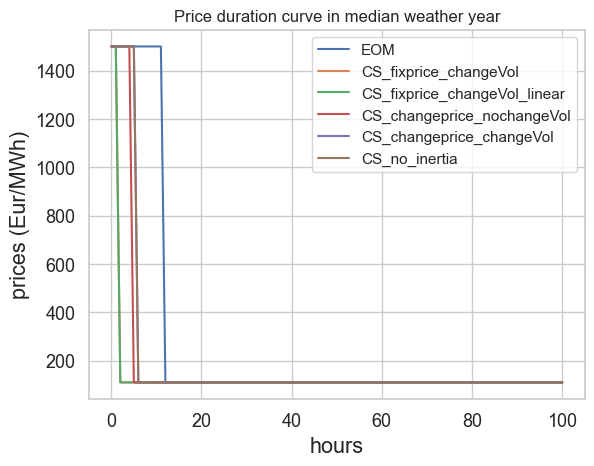

In [95]:
sorted_prices = Last_year_prices_data.apply(lambda x: x.sort_values(ascending=False).values)
axs2 = sorted_prices.loc[0:100].plot(color = default_colors)
plt.xlabel('hours', fontsize='large')
plt.ylabel('prices (Eur/MWh)', fontsize='large')
axs2.set_title('Price duration curve in median weather year')
fig2 = axs2.get_figure()
fig2.savefig(path_to_plots + '/' + 'Price_duration_curve.png', bbox_inches='tight', dpi=300)

In [96]:
Dismantled_capacity_data *= -1

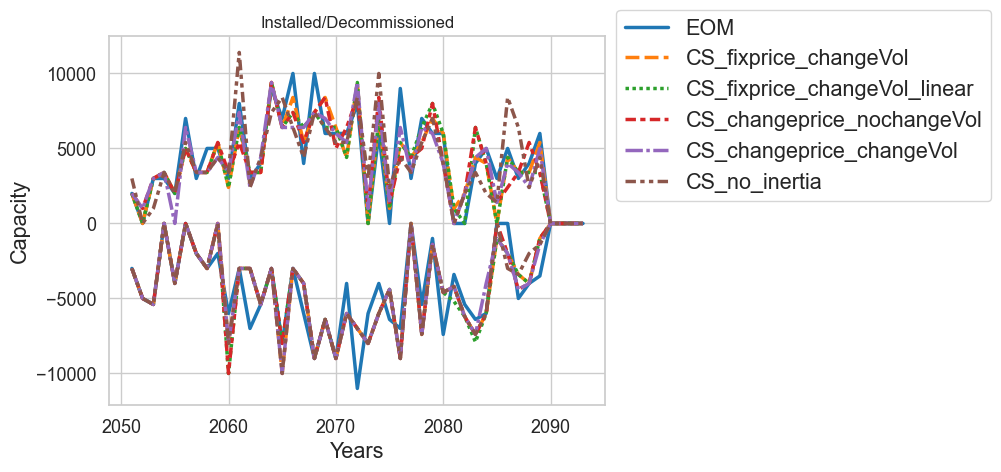

In [97]:
Dismantled_capacity_data.drop([2046, 2047,2048,2049,2050], inplace = True)
Invested_capacity_data.drop([2046, 2047,2048,2049,2050], inplace = True)

# Dismantled_capacity_data.drop([-4, -3,-2,-1, 0], inplace = True)
# Invested_capacity_data.drop([-4, -3,-2,-1, 0], inplace = True)

axs2 = sns.lineplot(data=Dismantled_capacity_data, palette="tab10", linewidth=2.5)
axs2 = sns.lineplot(data=Invested_capacity_data, palette="tab10", linewidth=2.5, legend = None) 
#sns.lineplot(data=Invested_capacity_data,palette="tab10", linewidth=2.5,    ax=axs2, legend = None)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Capacity', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
axs2.set_title('Installed/Decommissioned')
fig2 = axs2.get_figure()
fig2.savefig(path_to_plots + '/' + 'Invested_Dismantled_ Capacity.png', bbox_inches='tight', dpi=300)

In [98]:

InstalledCapacity_data.drop([ 2090,2091,2092, 2092], inplace=True)

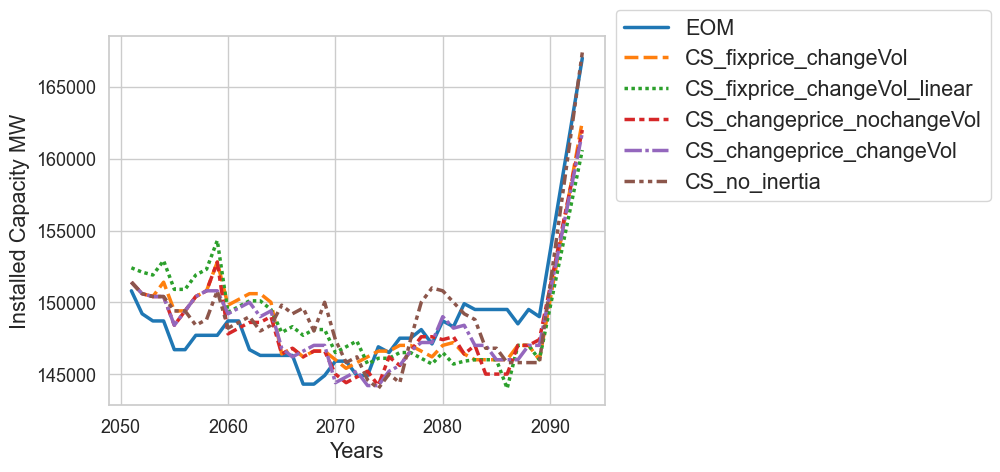

In [99]:
InstalledCapacity_data
axs2 = sns.lineplot(data=InstalledCapacity_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Installed Capacity MW', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs2.set_title('Market-based Cost recovery')
fig2 = axs2.get_figure()
fig2.savefig(path_to_plots + '/' + 'InstalledCapacity.png', bbox_inches='tight', dpi=300)

In [100]:
melted = pd.melt(CostRecovery_data )

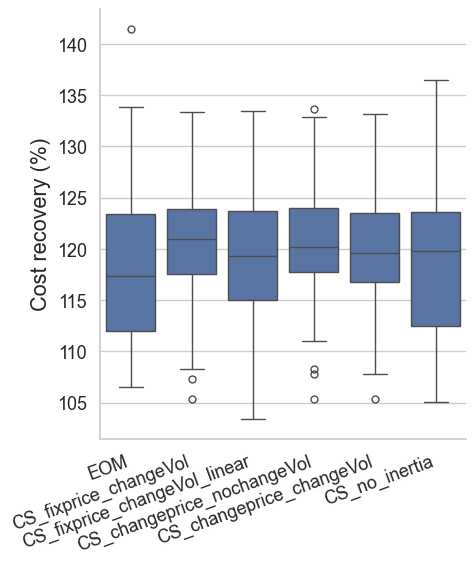

In [101]:
axs33 = sns.catplot(data=melted, x="variable", y="value",  kind="box")
#plt.xlabel('Weather profiles sequence', fontsize='large')
plt.xlabel('', fontsize='large')
plt.ylabel('Cost recovery (%)', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=20, ha='right')   
#fig3 = axs33.get_figure()
axs33.savefig(path_to_plots + '/' + 'Cost_Recovery_boxes '+ name  + '.png', bbox_inches='tight', dpi=300)

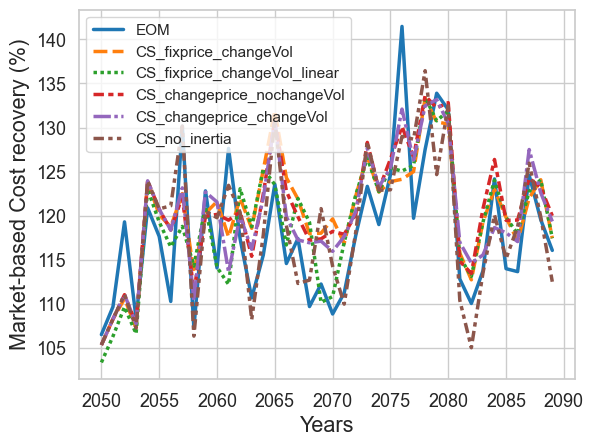

In [102]:
#CostRecovery_data.drop([2050], inplace=True)
axs3 = sns.lineplot(data=CostRecovery_data[CRM_scenarios], palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Market-based Cost recovery (%)', fontsize='large')
#plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs2.set_title('Market-based Cost recovery')
fig3 = axs3.get_figure()
fig3.savefig(path_to_plots + '/' + 'Cost_Recovery '+ name  + '.png', bbox_inches='tight', dpi=300)

In [103]:
# CostRecovery_data_substracted = CostRecovery_data.sub(CostRecovery_data['fix_profiles'], axis=0)
# axs3 = sns.lineplot(data=CostRecovery_data_substracted, palette="tab10", linewidth=2.5)
# plt.grid()
# sns.set_style("whitegrid")
# plt.grid()
# plt.xlabel('Years', fontsize='large')
# plt.ylabel('Market-based Cost recovery (Eur)', fontsize='large')
# plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
# #axs2.set_title('Market-based Cost recovery')
# fig3 = axs3.get_figure()
# fig3.savefig(path_to_plots + '/' + 'Cost_Recovery_substracted.png', bbox_inches='tight', dpi=300)
# axs33 = sns.catplot(data=pd.melt(CostRecovery_data_substracted ), x="variable", y="value",  kind="box")
# plt.xlabel('Weather profiles sequence', fontsize='large')
# plt.ylabel('Cost recovery (%)', fontsize='large')
# plt.tight_layout()
# plt.xticks(rotation=90, size = 15)   
# fig3 = axs3.get_figure()
# fig3.savefig(path_to_plots + '/' + 'Cost_Recovery_difference.png', bbox_inches='tight', dpi=300)

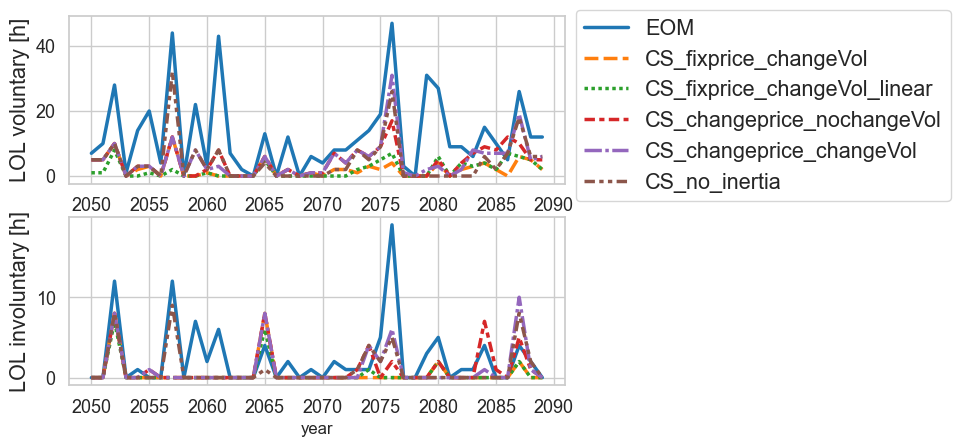

In [104]:
#LOL_data.drop([2050], inplace=True)
# fig, axes = plt.subplots(nrows=2, ncols=1)
# sns.set_style("whitegrid")
# sns.lineplot(data=LOL_data,palette="tab10", linewidth=2.5,  ax=axes[0], legend = None)
# plt.ylim([0, 25])
# plt.ylabel('Hours', fontsize='large')

# sns.lineplot(data=LOL_data,palette="tab10", linewidth=2.5,    ax=axes[1], legend = None)
# plt.ylim([0, 220])
# #axes[1].legend(LOL_data.columns.values, fontsize='medium',  bbox_to_anchor=(1, 1.1))
# plt.ylabel('Hours', fontsize='large')
# axes[0].set_title('LOLE')
# fig.savefig(path_to_plots + '/' + 'LOLE.png', bbox_inches='tight', dpi=300)

fig, axes= plt.subplots(nrows=2, ncols=1)
sns.lineplot(data=LOLvoluntary, palette="tab10", linewidth=2.5, ax=axes[0], legend = True )
axes[0].set_ylabel('LOL voluntary [h]',  fontsize='large')

plt.grid()
legend = axes[0].legend(loc='upper left',  bbox_to_anchor=(1, 1.1) ,  fontsize='large')
axs6 = sns.lineplot(data=LOL_data, palette="tab10", linewidth=2.5, ax=axes[1], legend = None )

sns.set_style("whitegrid")
plt.grid()
#plt.xlabel('Years', fontsize='large')
plt.ylabel('LOL involuntary [h]', fontsize='large')

fig6 = axs6.get_figure()
fig6.savefig(path_to_plots + '/' + 'LOLEs'+name + '.png', bbox_inches='tight', dpi=300)

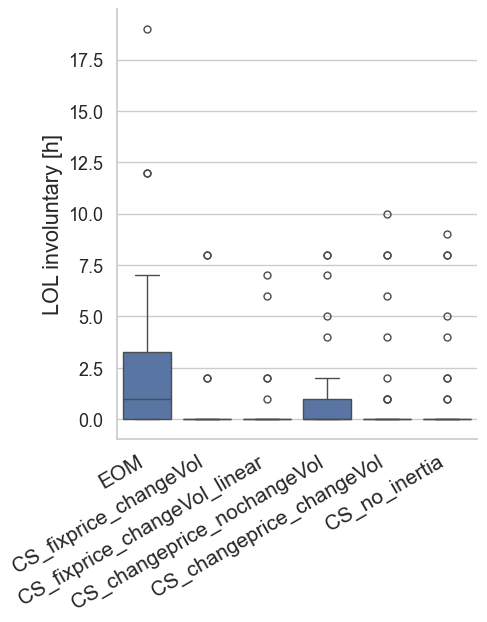

In [105]:
axs1 = sns.catplot( data=pd.melt(LOL_data), x="variable", y="value",  kind="box")
sns.set_palette(sns.color_palette(default_colors))
plt.xlabel('', fontsize='large')
plt.ylabel('LOL involuntary [h]', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=30, size = 15,  ha='right')  
axs1.savefig(path_to_plots + '/' + 'LOLE_boxes'+ name  + '.png', bbox_inches='tight', dpi=300)

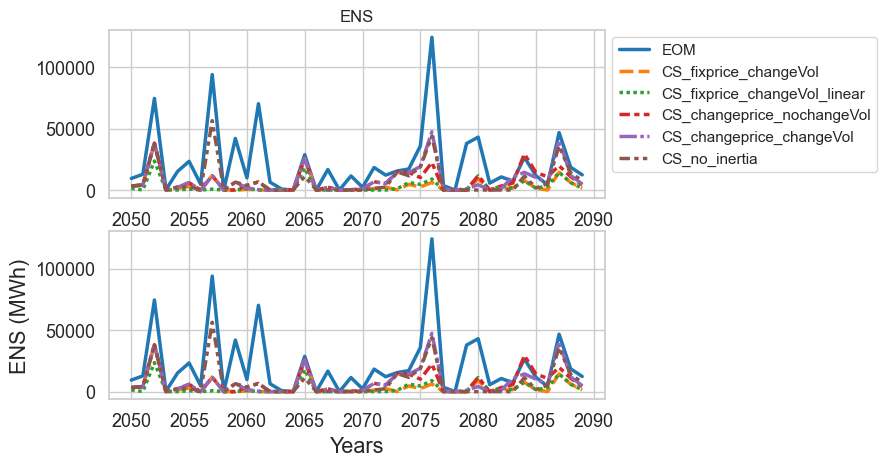

In [106]:
fig, axes= plt.subplots(nrows=2, ncols=1)
sns.lineplot(data=ENS_data, palette="tab10", linewidth=2.5, ax=axes[0])
plt.ylabel('MWh', fontsize='medium')
sns.move_legend(axes[0], "upper left", bbox_to_anchor=(1, 1))
#plt.ylim([0, 25000])
sns.lineplot(data=ENS_data, palette="tab10", linewidth=2.5, ax=axes[1], legend=None)
#plt.legend(fontsize='large',  bbox_to_anchor=(2, 1.1))
plt.xlabel('Years', fontsize='large')
plt.ylabel('ENS (MWh)', fontsize='large')
axes[0].set_title('ENS')
fig.savefig(path_to_plots + '/' + 'Energy not supplied'+ name  + '.png', bbox_inches='tight', dpi=300)

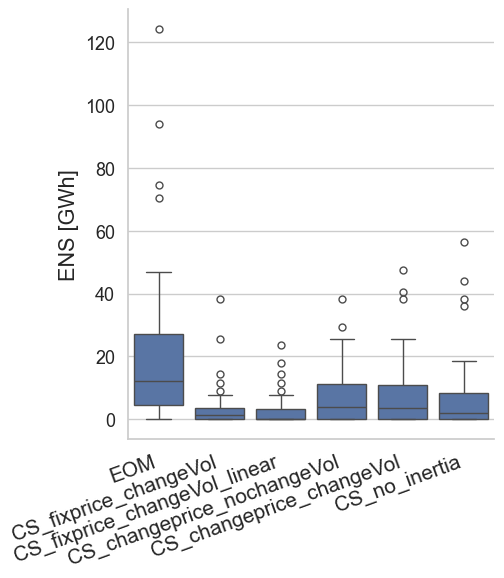

In [107]:
ENS_data_GWH = ENS_data/1000
axs1 = sns.catplot( data=pd.melt(ENS_data_GWH), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('ENS [GWh]', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=20, size = 15, ha='right')  
axs1.savefig(path_to_plots + '/' + 'ENS_boxes'+ name  + '.png', bbox_inches='tight', dpi=300)

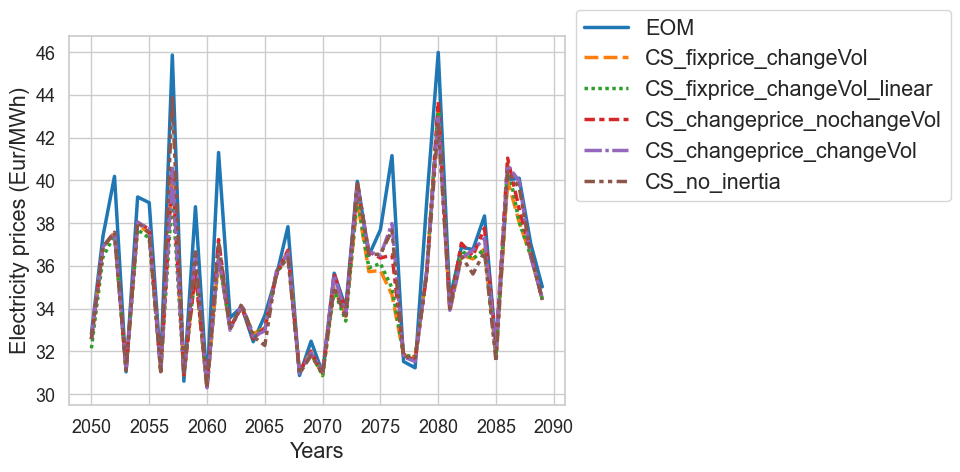

In [108]:
#CostRecovery_data.plot()
#ElectricityPrices_data.drop([2050], inplace=True)
axs6 = sns.lineplot(data=ElectricityPrices_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Electricity prices (Eur/MWh)', fontsize='large')
plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs6.set_title('Electricity prices')
fig6 = axs6.get_figure()
fig6.savefig(path_to_plots + '/' + 'Electricity prices.png', bbox_inches='tight', dpi=300)

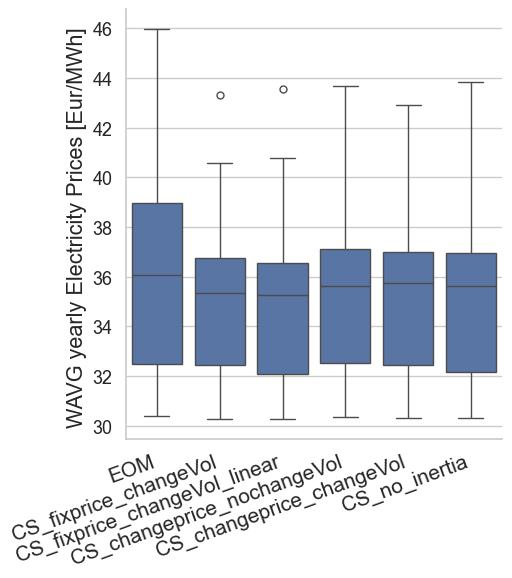

In [109]:
axs1 = sns.catplot( data=pd.melt(ElectricityPrices_data), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('WAVG yearly Electricity Prices [Eur/MWh] ', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=20, size = 15 ,  ha='right') 
axs1.savefig(path_to_plots + '/' + 'Electicity_prices_boxes'+ name  + '.png', bbox_inches='tight', dpi=300)

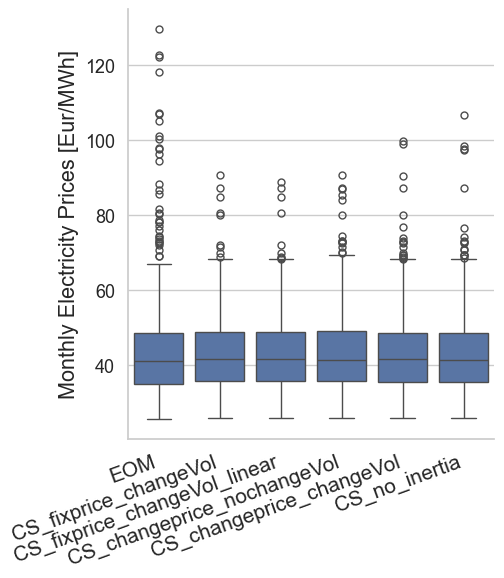

In [110]:
axs1 = sns.catplot( data=pd.melt(Monthly_ElectricityPrices_data), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('Monthly Electricity Prices [Eur/MWh]', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=20, size = 15,  ha='right') 
axs1.savefig(path_to_plots + '/' + 'Monthly_Electicity_prices_boxes'+ name  + '.png', bbox_inches='tight', dpi=300)

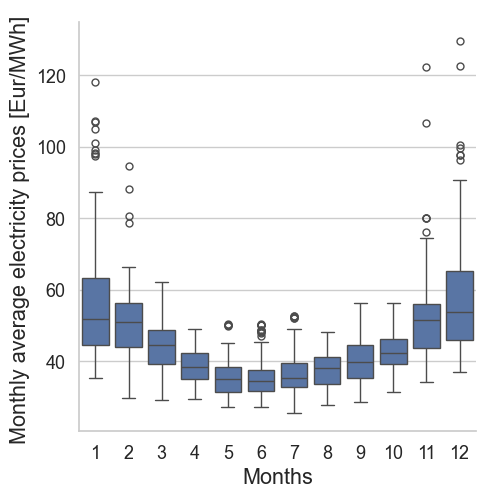

In [111]:
months = list(range(1,13))*40
mlted_monthly_prices = Monthly_ElectricityPrices_data[CRM_scenarios].copy()
mlted_monthly_prices['group'] = months
monthly_melted_electricity_prices = mlted_monthly_prices.melt(id_vars='group', var_name='Variable', value_name='Value')
axs1 = sns.catplot( data=monthly_melted_electricity_prices, x="group", y="Value",  kind="box")
plt.xlabel('Months', fontsize='large')
plt.ylabel('Monthly average electricity prices [Eur/MWh] ', fontsize='large')
axs1.savefig(path_to_plots + '/' + 'Monthly_Electricity_prices.png', bbox_inches='tight', dpi=300)

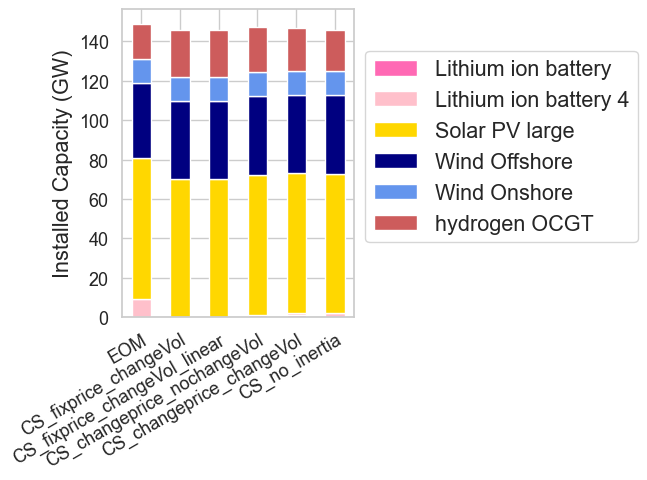

In [112]:
cpacities = Last_year_capacity_data.T
cpacities = cpacities/1000
cpacities_nozeroes = cpacities[cpacities>0]
cpacities_nozeroes.dropna(how='all', axis =1, inplace=True)

cpacities_nozeroes.rename(columns=technology_names, inplace=True)
colors = [technology_colors[tech] for tech in cpacities_nozeroes.columns.values]
axs9 = cpacities_nozeroes.plot(kind='bar', stacked=True, color=colors, figsize = (3,4))
sns.set_style("whitegrid")
axs9.set_xticklabels(cpacities_nozeroes.index.values, rotation = 30,  rotation_mode="anchor", ha="right")
plt.ylabel('Installed Capacity (GW)', fontsize='large')
plt.legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 0.9))
fig9 = axs9.get_figure()
fig9.savefig(path_to_plots + '/' + 'Last year capacity'+ name  + '.png', bbox_inches='tight', dpi=300)


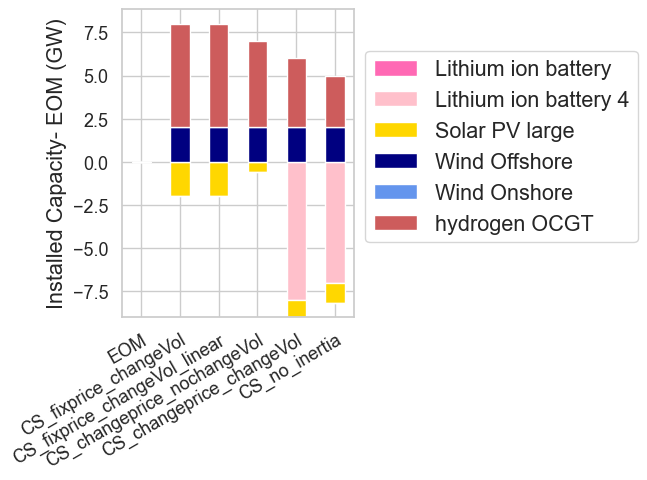

In [113]:
result = cpacities_nozeroes.sub(cpacities_nozeroes.iloc[0])
axs10 = result.plot(kind='bar', stacked=True, color=colors, figsize = (3,4))
axs10.set_xticklabels(cpacities_nozeroes.index.values, rotation = 30,  rotation_mode="anchor", ha="right")
plt.ylabel('Installed Capacity- EOM (GW)', fontsize='large')
plt.legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 0.9))
fig10 = axs10.get_figure()
fig10.savefig(path_to_plots + '/' + 'Last year capacity difference'+ name  + '.png', bbox_inches='tight', dpi=300)

In [114]:
row_totals = cpacities_nozeroes.sum(axis=1)
share_capacities = pd.DataFrame()
# Create new columns with percentages for each column
for column in cpacities_nozeroes.columns:
    share_capacities[column] = (cpacities_nozeroes[column] / row_totals) * 100
share_capacities

,Lithium ion battery,Lithium ion battery 4,Solar PV large,Wind Offshore,Wind Onshore,hydrogen OCGT
EOM,NaN,6.040268,48.322148,25.503356,8.053691,12.080537
CS_fixprice_changeVol,NaN,NaN,47.945205,27.397260,8.219178,16.438356
CS_fixprice_changeVol_linear,NaN,NaN,47.945205,27.397260,8.219178,16.438356
CS_changeprice_nochangeVol,0.678426,NaN,48.439620,27.137042,8.141113,15.603799
CS_changeprice_changeVol,0.680272,0.680272,48.299320,27.210884,8.163265,14.965986
CS_no_inertia,NaN,1.371742,48.559671,27.434842,8.230453,14.403292


Index(['Lithium ion battery', 'Lithium ion battery 4', 'Solar PV large',
       'Wind Offshore', 'Wind Onshore', 'hydrogen OCGT', 'Total'],
      dtype='object')


C:\Users\isanchezjimene\AppData\Local\Temp\ipykernel_1504\3390491597.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(newcolumns, rotation = 30,  rotation_mode="anchor", ha="left")


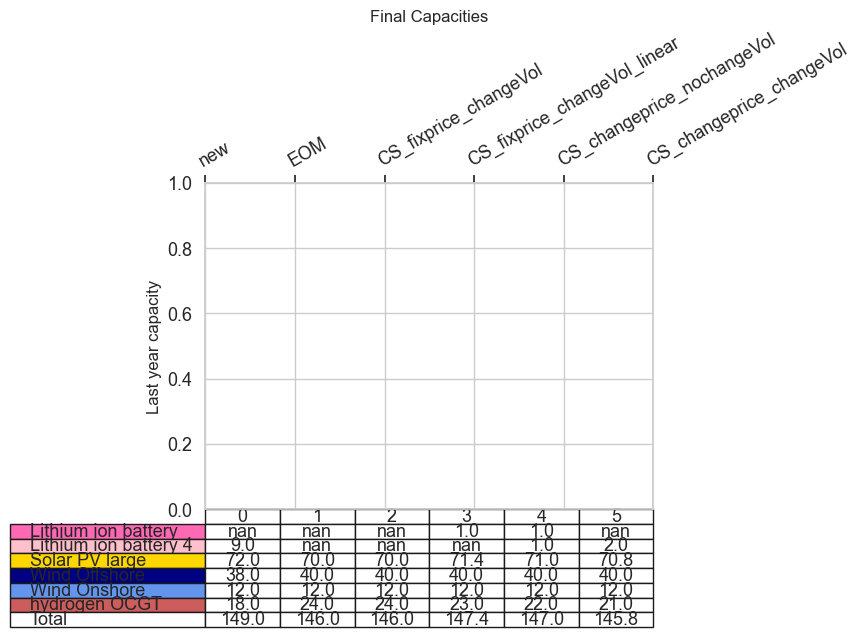

In [115]:
final_year_capacities = cpacities_nozeroes.T
data =final_year_capacities.values
columns = list(range(0, len(final_year_capacities.columns))) #final_year_capacities.columns
newcolumns = final_year_capacities.columns.insert(0, "new")
rows = final_year_capacities.index

n_rows = len(data)
bar_width = 0.3
index = np.arange(len(columns)) + bar_width

# Initialize the vertical-offset for the stacked bar chart.
offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
fig, axs = plt.subplots()
# for row in range(n_rows):
#     plt.bar(index, data[row], bar_width,  color=colors[row])
# plt.show()    

# text with total
total_row = final_year_capacities.sum(axis=0)
total_df = pd.DataFrame(total_row).T
total_df.index = ['Total']
withtotal = pd.concat([final_year_capacities, total_df])

for row in range(n_rows+ 1):

    cell_text.append(['%1.1f' % (x ) for x in withtotal.values[row]])
    
rows = withtotal.index
print(rows)
colors_whit = colors
colors_whit.append("white")
# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors_whit,
                      colLabels=columns,
                      cellLoc ='center',
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.title('Final Capacities')
plt.ylabel("Last year capacity")

ax = plt.gca()
ax.xaxis.tick_top()
ax.set_xticklabels(newcolumns, rotation = 30,  rotation_mode="anchor", ha="left")
# plt.show()
# plt.savefig(path_to_plots + '/' + 'Last year capacity with numbers.png')
fig10 = plt.gcf()
fig10.savefig(path_to_plots + '/' + 'Last year capacity with numbers.png', bbox_inches='tight', dpi=300)

In [116]:
median_annual_production

,EOM,CS_fixprice_changeVol,CS_fixprice_changeVol_linear,CS_changeprice_nochangeVol,CS_changeprice_changeVol,CS_no_inertia
Biofuel,NaN,NaN,NaN,NaN,NaN,NaN
Lithium ion battery 4,3.162608,NaN,NaN,NaN,0.322372,0.653228
Nuclear,NaN,NaN,NaN,NaN,NaN,NaN
Solar PV large,105.933427,102.956410,102.956410,104.684901,104.218948,103.942618
Wind Offshore,171.024179,180.054465,180.054465,179.908795,179.943292,179.949640
Wind Onshore,42.048616,41.910612,41.910612,41.698699,41.771881,41.763946
hydrogen CCGT,NaN,NaN,NaN,NaN,NaN,NaN
hydrogen OCGT,6.522785,8.022776,8.022776,7.875922,7.610858,7.473584


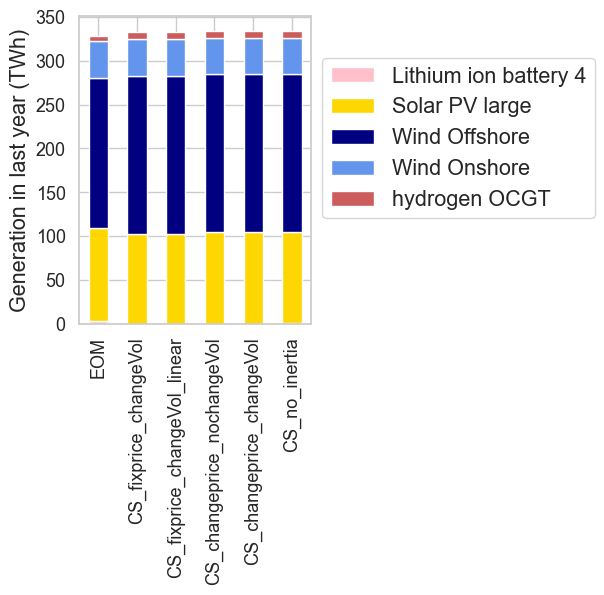

In [117]:

median_annual_productionnozeros = median_annual_production[median_annual_production>0]
median_annual_productionnozeros.dropna(how='all', axis =0, inplace=True)
colors = [technology_colors[tech] for tech in median_annual_productionnozeros.index.values]
axs10 = median_annual_productionnozeros.T.plot(kind='bar', stacked=True, color=colors, figsize = (3,4))
sns.set_style("whitegrid")
# axs10.set_xticklabels(cpacities_nozeroes.index.values, rotation = 30,  rotation_mode="anchor", ha="right")
plt.ylabel('Generation in last year (TWh)', fontsize='large')
plt.legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 0.9))
fig10 = axs10.get_figure()
fig10.savefig(path_to_plots + '/' + 'Generation in last year(TWh) .png', bbox_inches='tight', dpi=300)

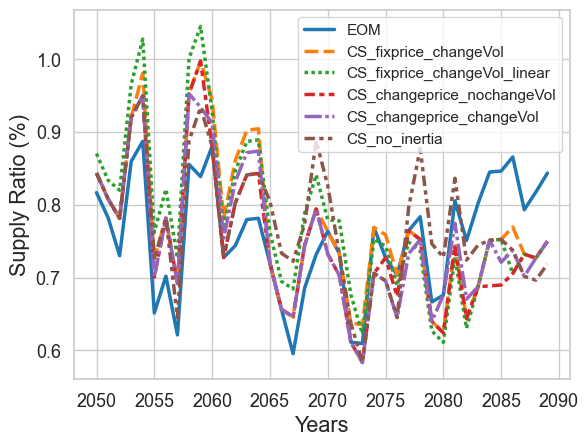

In [118]:
axs7 = sns.lineplot(data=SupplyRatio_data, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Supply Ratio (%)', fontsize='large')
#plt.legend(fontsize='large',  bbox_to_anchor=(1, 1.1))
#axs7.set_title('Supply Ratio')
fig7 = axs7.get_figure()
fig7.savefig(path_to_plots + '/' + 'Supply Ratio.png', bbox_inches='tight', dpi=300)


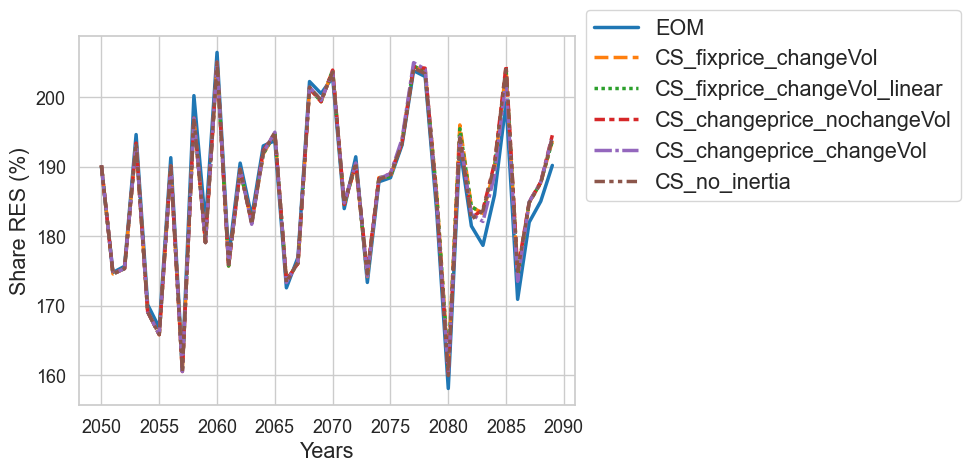

In [119]:
percentage_RES = ShareRES_data
axs8 = sns.lineplot(data=percentage_RES, palette="tab10", linewidth=2.5)
plt.grid()
sns.set_style("whitegrid")
plt.grid()
plt.xlabel('Years', fontsize='large')
plt.ylabel('Share RES (%)', fontsize='large')
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))
#axs8.set_title('Share RES')
fig8 = axs8.get_figure()
fig8.savefig(path_to_plots + '/' + 'Share RES.png', bbox_inches='tight', dpi=300)


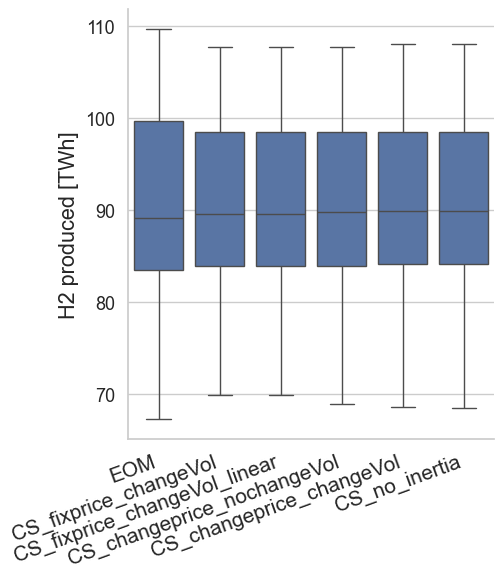

In [120]:
H2Production_data_twh = (H2Production_data/1000000)*0.74 # 74% electrolyzers efficiency
axs1 = sns.catplot( data=pd.melt(H2Production_data_twh), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('H2 produced [TWh]', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=20, size = 15, ha='right') 
axs1.savefig(path_to_plots + '/' + 'Electrolyzer_boxes.png', bbox_inches='tight', dpi=300)

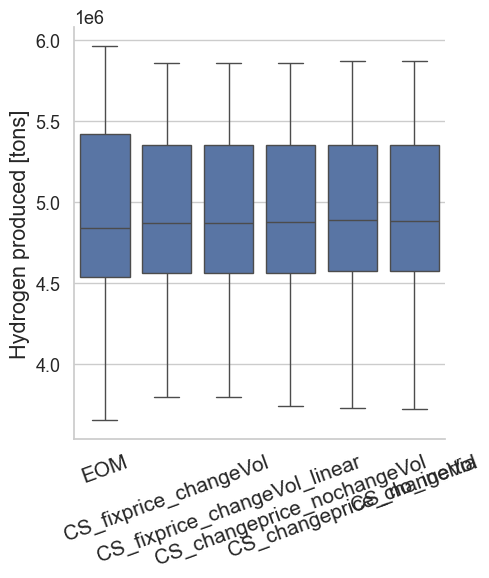

In [121]:
Energy_consumed_in_electrolysis = 1/ 0.74
#Hydrogen produced (kg) = Energy consumed in electrolysis (kWh) / LHV of hydrogen kWh/kg
kg_hydrogen_per_kwh= Energy_consumed_in_electrolysis/ 33.6  
ton_hydrogen_per_mwh = kg_hydrogen_per_kwh
H2Production_tons = H2Production_data*ton_hydrogen_per_mwh
axs1 = sns.catplot( data=pd.melt(H2Production_tons), x="variable", y="value",  kind="box")
plt.xlabel('', fontsize='large')
plt.ylabel('Hydrogen produced [tons]', fontsize='large')
plt.tight_layout()
plt.xticks(rotation=20, size = 15)   
axs1.savefig(path_to_plots + '/' + 'Hydrogen production_boxes.png', bbox_inches='tight', dpi=300)

In [122]:
# sns.set_theme(style="whitegrid")
# sns.set(font_scale=1.2)
# sheet_name = "groupedDecarbonizedNL"
# df = pd.read_excel("C:\\toolbox-amiris-emlab\\data\\Power_plants.xlsx",
#                    sheet_name=sheet_name)

# colors = [technology_colors[tech] for tech in df["Technology"].unique()]

# fig1 = sns.relplot(x="Age", y="Efficiency", hue="Technology", size="Capacity",
#                    sizes=(40, 400), alpha=.5, palette=colors,
#                    height=6, data=df)
# plt.xlabel("Age", fontsize="large")
# plt.ylabel("Efficiency", fontsize="large")
# fig1.savefig(path_to_plots + '/' + 'Initial_power_plants' +sheet_name + '.png', bbox_inches='tight', dpi=300)


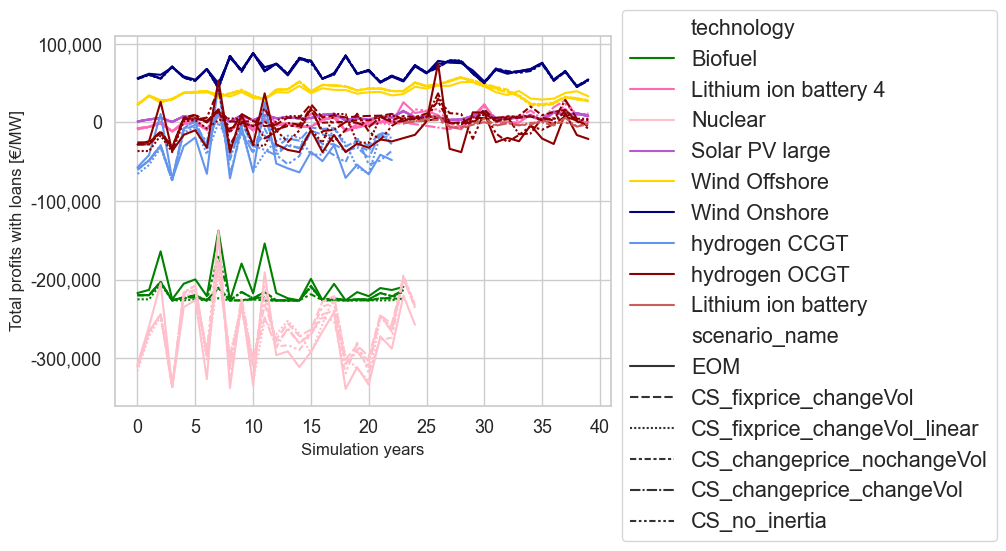

<Figure size 640x480 with 0 Axes>

In [123]:
AverageNPVpertechnology = pd.read_excel(path_to_results, sheet_name='AverageNPVpertechnology',  header=[0,1], index_col=0)
# AverageProfits_filtered = AverageProfitswLoans.loc[:, (slice(None), selected_scenarios)]
AverageProfits_filtered = AverageProfitswLoans[selected_scenarios]
#newlist = [s.split('.')[0] if '.' in s else s for s in AverageProfits_filtered.columns.levels[0]]
colors = [technology_colors[key] for key in AverageProfits_filtered.columns.levels[1].unique()]

AverageProfits_all =  pd.melt( AverageProfits_filtered.reset_index(), id_vars=[('index')])
AverageProfits_all.replace(technology_names, inplace=True)
# AverageProfits_all.columns = ['year', 'technology', 'scenario_name', 'value'] 
fig, ax = plt.subplots()
sns.lineplot(x="index", y="value",  hue = "technology", style="scenario_name",
             data=AverageProfits_all,
             palette=colors
             ).set(xlabel='Simulation years', ylabel='Total profits with loans [€/MW]')
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()
plt.savefig(path_to_plots + '/' + 'operational_profits.png', bbox_inches='tight', dpi=300)

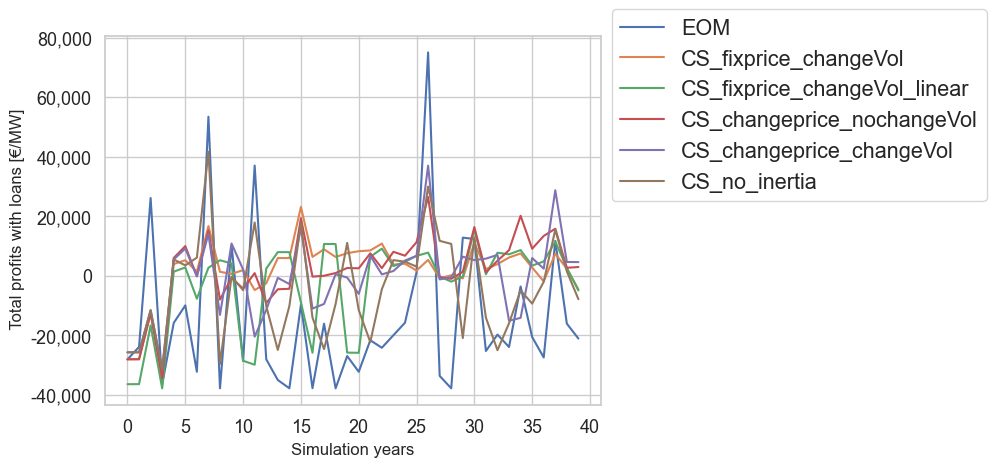

In [124]:
gasplants  = AverageProfitswLoans.xs('hydrogen OCGT', axis=1, level=1)
gasplants_all = pd.melt(gasplants.reset_index(), id_vars=[( 'index')])
# gasplants_all.columns = ['year', 'technology', 'scenario_name', 'value']
fig, ax = plt.subplots()
sns.lineplot(x="index", y="value",  hue="scenario_name", # style = "technology"
             data=gasplants_all, 
           ).set(xlabel='Simulation years', ylabel=' Total profits with loans [€/MW]')
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))
ax.get_yaxis().set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.savefig(path_to_plots + '/' + 'gas plants operational profit.png', bbox_inches='tight', dpi=300)


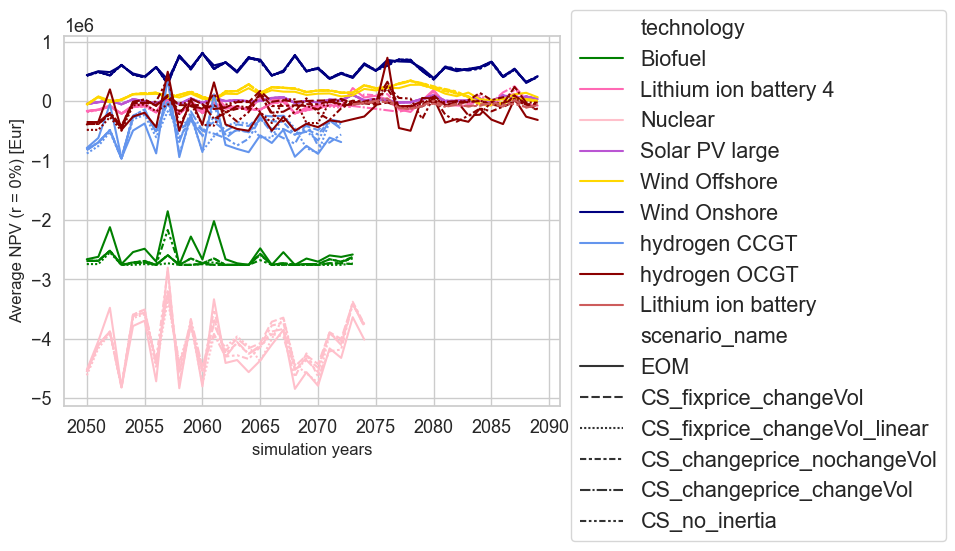

In [125]:
colors = [technology_colors[key] for key in AverageNPVpertechnology.columns.levels[1].unique()]
AverageNPVpertechnology_all = pd.melt(AverageNPVpertechnology.reset_index(),id_vars=[( 'years')])

AverageNPVpertechnology_all.columns = ['year',  'scenario_name', 'technology', 'NPV']
sns.lineplot(x="year", y="NPV",  hue = "technology", style="scenario_name",
             data=AverageNPVpertechnology_all, 
             palette=colors
           ).set(xlabel='simulation years', ylabel='Average NPV (r = 0%) [Eur]')
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))

plt.savefig(path_to_plots + '/' + 'NPVs_0_dscount_rate.png', bbox_inches='tight', dpi=300)

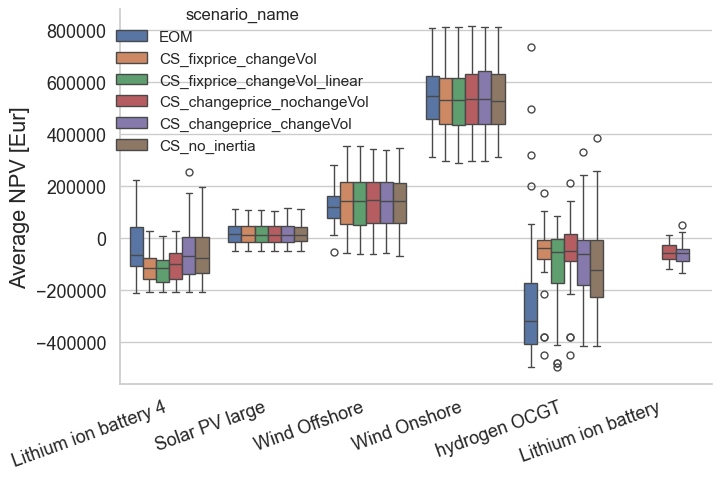

In [126]:
all_techs =["hydrogen OCGT","Lithium ion battery" ,  "Lithium ion battery 4","Wind Offshore", "Wind Onshore","Solar PV large" ] 
dispatchable = AverageNPVpertechnology_all[AverageNPVpertechnology_all['technology'].isin(all_techs)]
axs1 = sns.catplot( data=dispatchable, hue="scenario_name", y="NPV", x="technology", kind="box" )
axs1._legend.set_bbox_to_anchor((0.5, 0.8)) 
[plt.setp(ax.get_xticklabels(), rotation=20, ha="right")for ax in axs1.axes.flat]
plt.xlabel('', fontsize='large')
plt.ylabel('Average NPV [Eur]', fontsize='large')
#plt.legend(fontsize='small',   bbox_to_anchor=(0, 1.1))
plt.tight_layout()
axs1.savefig(path_to_plots + '/' + 'plants_all.png', bbox_inches='tight')

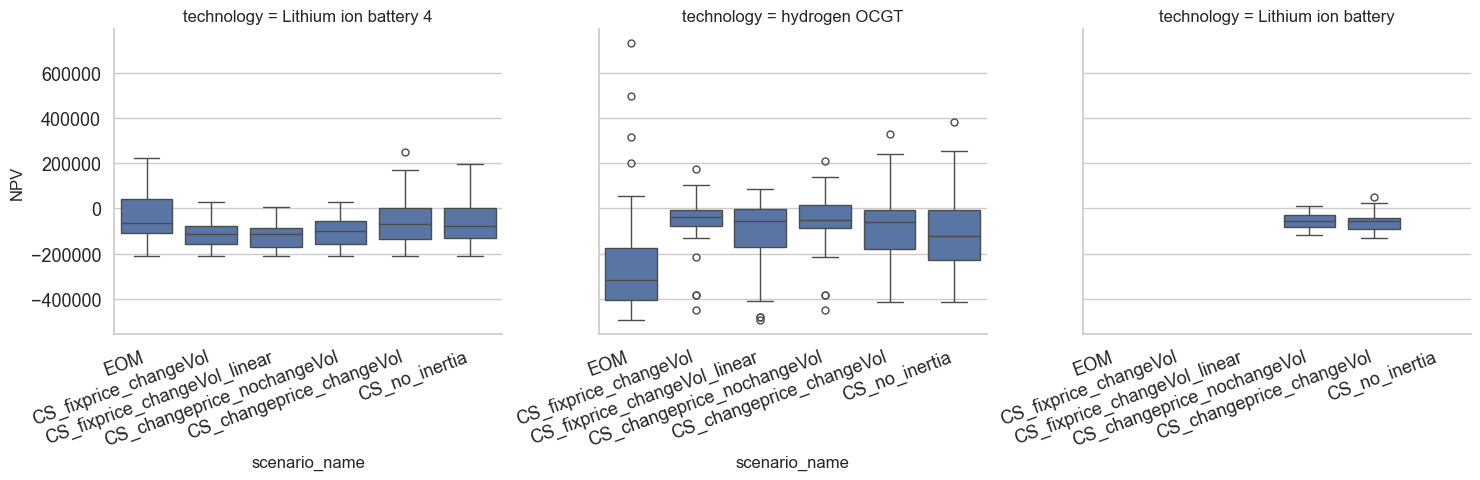

In [127]:
options =["hydrogen OCGT","Lithium ion battery" ,  "Lithium ion battery 4"] #"WTG_offshore", "WTG_onshore","PV_utility_systems" ] 
dispatchable = AverageNPVpertechnology_all[AverageNPVpertechnology_all['technology'].isin(options)]
axs1 = sns.catplot( data=dispatchable, col="technology", y="NPV", x="scenario_name", kind="box")
[plt.setp(ax.get_xticklabels(), rotation=20, ha="right")for ax in axs1.axes.flat]
plt.xlabel('', fontsize='large')
plt.ylabel('Average NPV', fontsize='large')
plt.tight_layout()
axs1.savefig(path_to_plots + '/' + 'Dispatchable_plants_all.png', bbox_inches='tight')

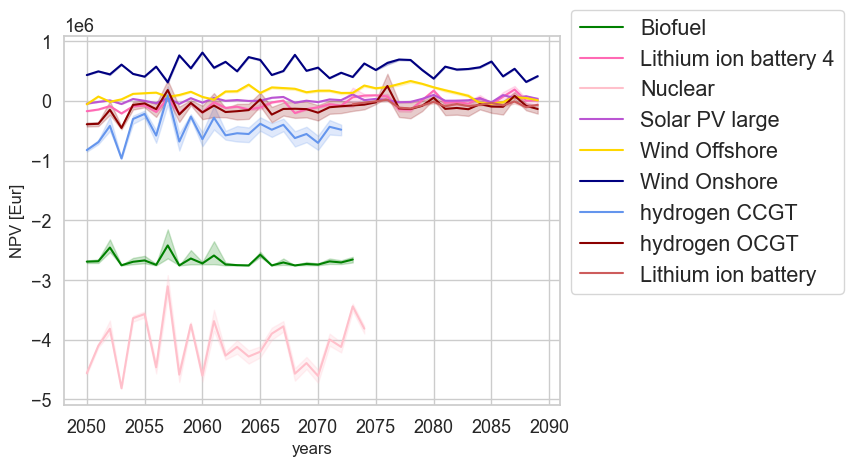

In [128]:
sns.lineplot(x="year", y="NPV",  hue = "technology",# style="scenario_name",
            data=AverageNPVpertechnology_all,    palette=colors).set(xlabel='years', ylabel='NPV [Eur]')
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))
plt.savefig(path_to_plots + '/' + 'NPVs_0_dscount_rate_all.png', bbox_inches='tight', dpi=300)

In [129]:
# FLH_data = pd.read_excel(path_to_results, sheet_name='FLH', index_col=0)
# Years_data = pd.read_excel(path_to_results, sheet_name='YEARS', index_col=0)

In [130]:
min_val = InstalledCapacity_data.min()
max_val = InstalledCapacity_data.max()
normalized_capacity = (InstalledCapacity_data - min_val) / (max_val - min_val)
normalized_capacity.head()

,EOM,CS_fixprice_changeVol,CS_fixprice_changeVol_linear,CS_changeprice_nochangeVol,CS_changeprice_changeVol,CS_no_inertia
2051,0.286356,0.348857,0.506084,0.404551,0.409148,0.316282
2052,0.215869,0.302343,0.488012,0.359607,0.363693,0.282094
2053,0.193841,0.290715,0.475964,0.348371,0.352330,0.273547
2054,0.193841,0.348857,0.536205,0.348371,0.352330,0.273547
2055,0.105732,0.232572,0.415723,0.236011,0.238693,0.230812


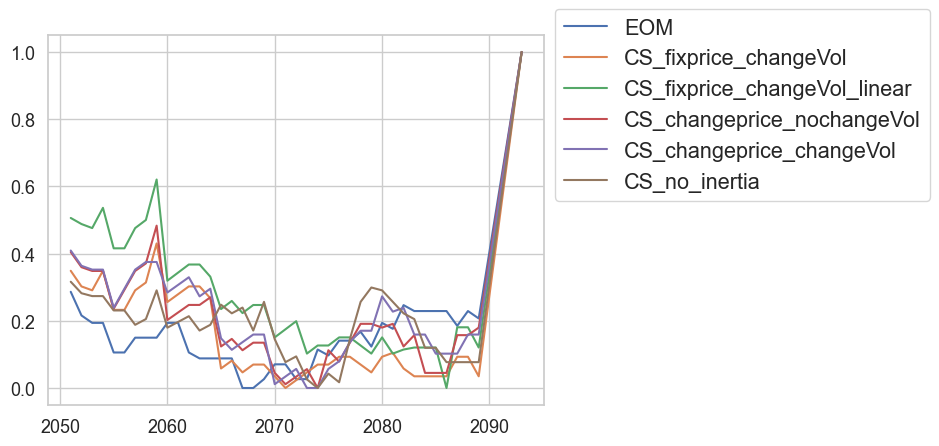

In [131]:
normalized_capacity.plot()
plt.legend(fontsize='large', loc='upper left', bbox_to_anchor=(1, 1.1))

In [132]:
# full_load_hours = pd.DataFrame()
# full_load_hours= Years_data.applymap(FLH_data['average'].get)
# full_load_hours["year"] = full_load_hours.index.values + 2050
# full_load_hours.set_index('year', inplace = True)
# full_load_hours.drop(2050, inplace = True)
# min_val = full_load_hours.min()
# max_val = full_load_hours.max()
# normalized_FLH = (full_load_hours - min_val) / (max_val - min_val)

In [133]:
# normalized_ElectricityPrices = ElectricityPrices_data.copy()
# normalized_ElectricityPrices.drop(2050, inplace = True)
# min_val = normalized_ElectricityPrices.min()
# max_val = normalized_ElectricityPrices.max()
# normalized_ElectricityPrices = (normalized_ElectricityPrices - min_val) / (max_val - min_val)

In [134]:
# bwr_reversed = plt.cm.get_cmap('bwr')
# num_columns = len(normalized_FLH.columns)
# fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(13, 8))

# for i, col1 in enumerate(normalized_FLH.columns):
#     print(col1)
#     if i == 0:
#         ax = axes[0,0]    
#     elif  i % 2 == 0:
#         ax =axes[0,round(i/2)]        
#     else:
#         ax = axes[1,math.floor(i/2)]    
#     ax.scatter(normalized_FLH[col1], normalized_capacity[col1], c=normalized_ElectricityPrices[col1], cmap='viridis') 
#     ax.set_title(col1)
#     ax.set_xlabel('normalized_FLH')
#     ax.set_ylabel("normalized_capacity")
# # plt.xlabel('normalized_FLH')
# # plt.ylabel("normalized_capacity")

# plt.tight_layout()
# plt.show()

In [135]:
# for i, col1 in enumerate(normalized_FLH.columns):
#     if i ==0: 
#         pass
#     else:
#         filteredrows =  (normalized_FLH[col1] >= 0.8) & (normalized_FLH[col1] <= 1)
#         plt.scatter(normalized_FLH[col1][filteredrows],
#                     normalized_capacity[col1][filteredrows],
#                     c=normalized_ElectricityPrices[col1][filteredrows], cmap=bwr_reversed,  alpha=0.5) 
# plt.xlabel('normalized Full Load hours')
# plt.ylabel("normalized Installed Capacity")

# plt.legend()
# plt.savefig(path_to_plots + '/' + 'yearly_capacity_FLH.png', bbox_inches='tight', dpi=300)

In [136]:
#ElectricityPrices_data_minus2050  = ElectricityPrices_data.drop(2050)

In [137]:
# for i, col1 in enumerate(normalized_FLH.columns):
#     if i ==0: 
#         pass
#     else:
#         plt.scatter(full_load_hours[col1], InstalledCapacity_data[col1]/1000, 
#                     c=ElectricityPrices_data_minus2050[col1], cmap=bwr_reversed,  alpha=0.5) 
# plt.xlabel(' average full Load hours (wind + solar)')
# plt.ylabel("Installed Capacity GW")        
# plt.colorbar( orientation='vertical',
#              label="Yearly Electricity prices Eur/MWh")

# plt.savefig(path_to_plots + '/' + 'yearly_capacity_vs_FLH.png', bbox_inches='tight', dpi=300)        

In [138]:
# H2Production_data_twh_clean = H2Production_data_twh.drop(2050)

In [139]:
# for i, col1 in enumerate(normalized_FLH.columns):
#     if i ==0: 
#         pass
#     else:
#         plt.scatter(normalized_FLH[col1], normalized_capacity[col1], 
#                     c=H2Production_data_twh_clean[col1], cmap=bwr_reversed,  alpha=0.5) 
# plt.colorbar( orientation='vertical',
#              label="hydrogen production")        
# plt.xlabel('normalized Full Load hours')
# plt.ylabel("normalized Installed Capacity")   

In [140]:
# Years_data["year"] = Years_data.index.values + 2050
# Years_data.set_index('year', inplace = True)
# Years_data.drop(2050, inplace = True)

In [141]:
# high_electricity_years = Years_data[ElectricityPrices_data>50]
# high_electricity_years_all = pd.melt(high_electricity_years )
# high_electricity_years_all.drop("variable", axis = 1, inplace = True)

In [142]:
# high_electricity_years_all.value_counts()
# count_per_row = high_electricity_years.apply(lambda row: row.value_counts(), axis=1)
# print(count_per_row)

In [143]:
melted_electricity_prices = ElectricityPrices_data[selected_scenarios].copy()
melted_electricity_prices.reset_index(inplace = True)
melted_electricity_prices =melted_electricity_prices.melt(id_vars='index', var_name='Variable', value_name='Value')
melted_electricity_prices.rename(columns={'index': 'year'}, inplace = True)

In [144]:
melted_LOLE = LOL_data[selected_scenarios].copy()
melted_LOLE.reset_index(inplace=True)
melted_LOLE = melted_LOLE.melt(id_vars='year', var_name='Variable', value_name='Value')

melted_cost_recovery = CostRecovery_data[selected_scenarios].copy()
melted_cost_recovery.reset_index(inplace=True)
melted_cost_recovery = melted_cost_recovery.melt(id_vars='index', var_name='Variable', value_name='Value') 

ENS= ENS_data.copy()
ENS_GWh = ENS/1000
melted_ENS = ENS_GWh[selected_scenarios].copy()
melted_ENS.reset_index(inplace=True)
melted_ENS = melted_ENS.melt(id_vars='index', var_name='Variable', value_name='Value')

melted_H2Production_data_twh = H2Production_data_twh[selected_scenarios].copy()
melted_H2Production_data_twh.reset_index(inplace = True)
melted_H2Production_data_twh.head()
melted_H2Production_data_twh =melted_H2Production_data_twh.melt(id_vars='index', var_name='Variable', value_name='Value')

In [145]:

# fig, axes= plt.subplots(nrows=5, ncols=1, figsize=(5, 6))
# axes[0].set_ylabel('LOLE \n [hours]', fontsize='medium')
# LOL_data["fix_profiles"].plot( ax=axes[0], color = "green")
# LOL_data["stochastic_increase_demand"].plot( ax=axes[0], color = "red", linestyle='dashed')
# sns.lineplot(x="year", y="Value",ax=axes[0],  data=melted_LOLE[melted_LOLE["Variable"].isin(selected_scenarios)],
#             errorbar=('ci', 100))
# axes[0].legend(["baseline","increasing demand", "mean stochastic profiles", "stochastic profiles"], fontsize='medium',  bbox_to_anchor=(1 , 1))
# axes[0].set_xticklabels([])
# axes[0].set_xlabel([])

# axes[1].set_ylabel('EENS \n [GWh]', fontsize='medium')
# ENS_GWh["fix_profiles"].plot( ax=axes[1], color = "green")
# ENS_GWh["stochastic_increase_demand"].plot( ax=axes[1], color = "red", linestyle='dashed')
# sns.lineplot(x="year", y="Value",ax=axes[1],  data=melted_ENS[melted_ENS["Variable"].isin(selected_scenarios)],
#             errorbar=('ci', 100))
# axes[1].legend().remove()
# axes[1].set_xticklabels([])
# axes[1].set_xlabel([])

# axes[2].set_ylabel('WAvg \n electricity \n prices \n [Eur/MWh]', fontsize='medium')
# ElectricityPrices_data["fix_profiles"].plot( ax=axes[2], color = "green")
# ElectricityPrices_data["stochastic_increase_demand"].plot( ax=axes[2], color = "red", linestyle='dashed')
# sns.lineplot(x="year", y="Value", ax=axes[2], data=melted_electricity_prices[melted_electricity_prices["Variable"].isin(selected_scenarios)],
#             errorbar=('ci', 100))
# axes[2].legend().remove()
# axes[2].set_xticklabels([])
# axes[2].set_xlabel([])

# axes[3].set_ylabel('H2 \n production \n[TWh]', fontsize='medium')
# sns.lineplot(x="year", y="Value", ax=axes[3], data=melted_H2Production_data_twh, errorbar=('ci', 100))
# axes[3].set_xticklabels([])
# axes[3].set_xlabel([])
# H2Production_data_twh["fix_profiles"].plot( ax=axes[3], color = "green")
# H2Production_data_twh["stochastic_increase_demand"].plot( ax=axes[3], color = "red", linestyle='dashed')

# axes[4].set_ylabel('Cost \nrecovery\n %', fontsize='medium')
# CostRecovery_data["fix_profiles"].plot( ax=axes[4], color = "green")
# CostRecovery_data["stochastic_increase_demand"].plot( ax=axes[4], color = "red", linestyle='dashed')
# sns.lineplot(x="year", y="Value", ax=axes[4], 
#              data=melted_cost_recovery[melted_cost_recovery["Variable"].isin(selected_scenarios)],
#             errorbar=('ci', 100))
# axes[4].set_xlabel('Simulation years', fontsize='medium') 
# axes[4].legend().remove()
# plt.subplots_adjust(hspace=0.2) 
# plt.savefig(path_to_plots + '/' + 'LOLE_prices_recovery.png', bbox_inches='tight', dpi=300)     

In [146]:
# monthly_prices=  Monthly_ElectricityPrices_data[selected_scenarios].copy()
# monthly_prices.reset_index(inplace = True)
# monthly_prices.head()
# monthly_prices =monthly_prices.melt(id_vars='years', var_name='Variable', value_name='Value')

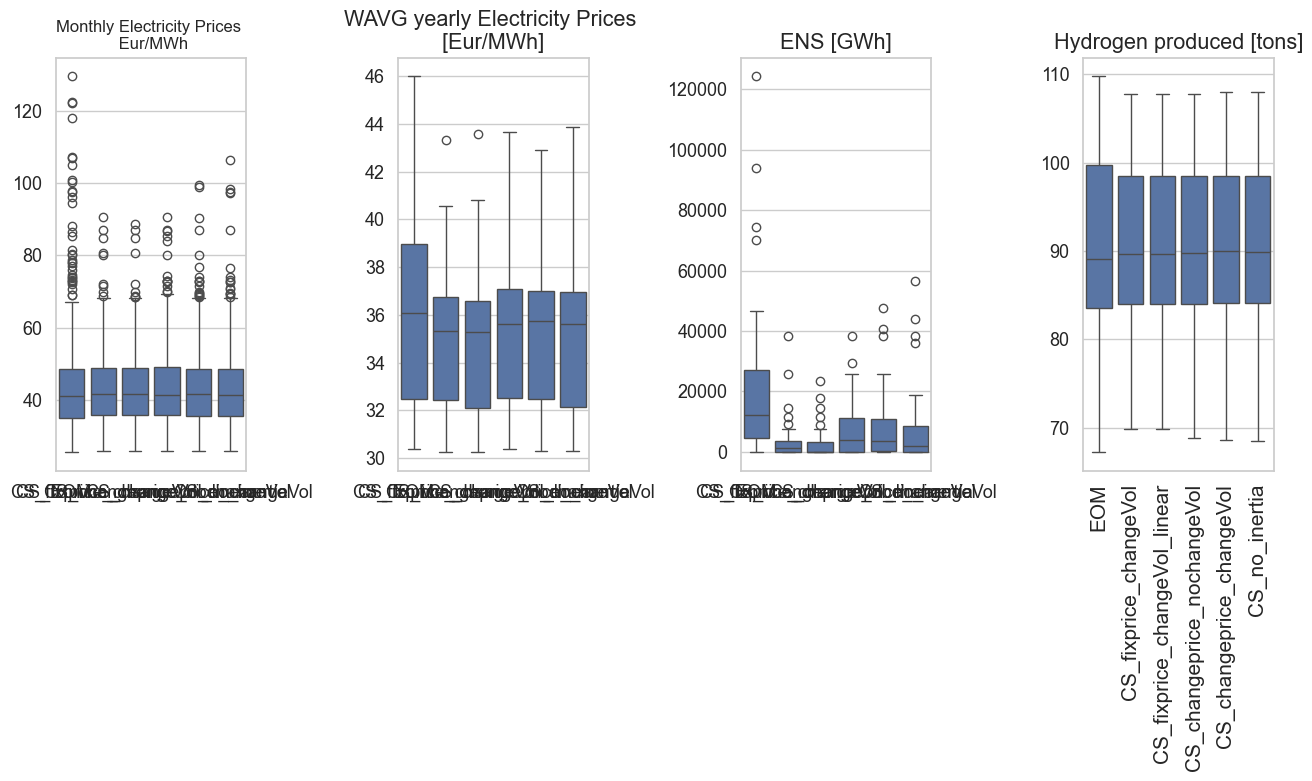

In [147]:
fig, axes= plt.subplots(nrows=1, ncols=4, figsize=(13, 8))
sns.boxplot( ax=axes[0], data=pd.melt(Monthly_ElectricityPrices_data),  x="variable", y="value")
axes[0].set_title('Monthly Electricity Prices \n Eur/MWh')
#axes[0].set_xticks(rotation=90, size = 15)
plt.xticks(rotation=90, size = 15)   

sns.boxplot( data=pd.melt(ElectricityPrices_data), ax=axes[1], x="variable", y="value")
axes[1].set_title('WAVG yearly Electricity Prices \n [Eur/MWh] ', fontsize='large')
plt.xticks(rotation=90, size = 15)   
  
sns.boxplot( data=pd.melt(ENS_data), ax=axes[2],  x="variable", y="value")
axes[2].set_title('ENS [GWh]', fontsize='large')
plt.xticks(rotation=90, size = 15)   

sns.boxplot( data=pd.melt(H2Production_data_twh),  ax=axes[3], x="variable", y="value")
axes[3].set_title('Hydrogen produced [tons]', fontsize='large')


axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')
  
plt.tight_layout()
axs1.savefig(path_to_plots + '/' + 'All.png', bbox_inches='tight', dpi=300)


In [148]:
# iterations_NPV =  AverageNPVpertechnology_all[AverageNPVpertechnology_all["scenario_name"].isin(selected_scenarios)]
# iterations_NPV_ = iterations_NPV.groupby(["year"])["value"].describe()
# fix_profiles_NPV =  AverageNPVpertechnology_all[AverageNPVpertechnology_all["scenario_name"]=="fix_profiles"]
# fix_profiles_NPV_ = fix_profiles_NPV.groupby(["year"])["value"].describe()
# stochasticNPV =  AverageNPVpertechnology_all[AverageNPVpertechnology_all["scenario_name"]=="stochastic_increase_demand"]
# stochasticNPV_ = stochasticNPV.groupby(["index"])["value"].describe()
# fix_profiles_profits =  AverageProfits_all[AverageProfits_all["scenario_name"]=="fix_profiles"]
# fix_profiles_profits_ = fix_profiles_profits.groupby(["index"])["value"].describe()
# stochastic_profits =  AverageProfits_all[AverageProfits_all["scenario_name"]=="stochastic_increase_demand"]
# stochastic_profits_ = stochastic_profits.groupby(["index"])["value"].describe()
# iterations_profits =  AverageProfits_all[AverageProfits_all["scenario_name"].isin(selected_scenarios)]
# iterations_profits_ = iterations_profits.groupby(["year"])["value"].describe()
# ser1 = pd.concat([fix_profiles_NPV_[["mean", "std"]], stochasticNPV_[["mean", "std"]], iterations_NPV_[["mean", "std"]]], axis = 1)
# ser2 = pd.concat([fix_profiles_profits_[["mean", "std"]], stochastic_profits_[["mean", "std"]], iterations_profits_[["mean", "std"]]], axis = 1)
# file = excelnpv =  os.path.join(path_to_plots,  "NPVs.xlsx")
# with pd.ExcelWriter(file) as writer:
#     ser1.to_excel(writer, sheet_name="npv", index=False)
#     ser2.to_excel(writer, sheet_name="profits", index=False)

In [149]:
column_name_mapping = {
    'iteration1': 'stochastic profiles',
    'iteration2': 'stochastic profiles',
    'iteration3': 'stochastic profiles',
    'iteration4': 'stochastic profiles',
    'iteration5': 'stochastic profiles',
    'iteration6': 'stochastic profiles',
    'iteration7': 'stochastic profiles',
    'iteration8': 'stochastic profiles',
    'iteration9': 'stochastic profiles',
    'iteration10': 'stochastic profiles',
    'stochastic_increase_demand': 'increasing demand',
    'fix_profiles': 'baseline',
}

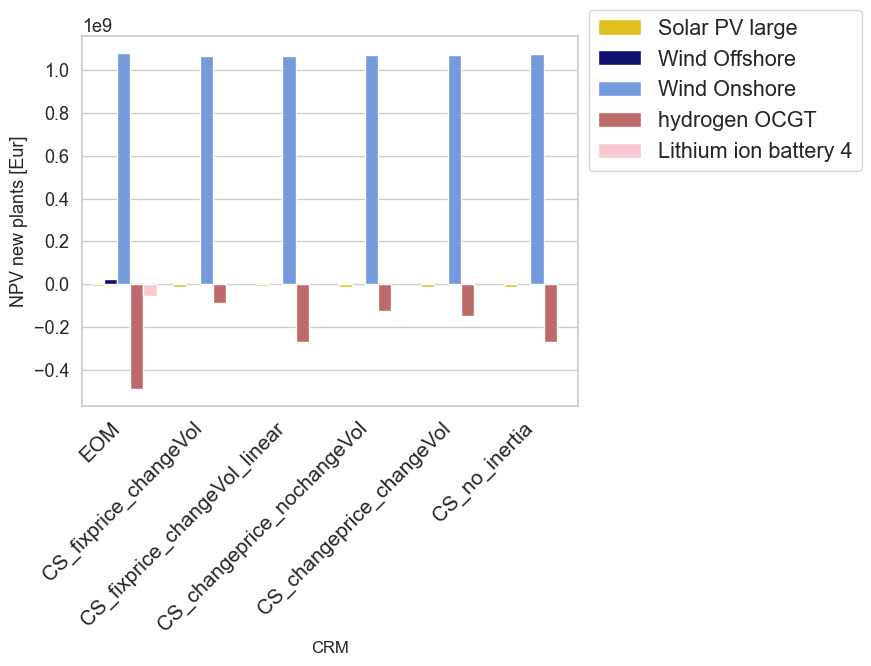

In [150]:
# Use the rename method to change column names
NPVNewPlants_data = NPVNewPlants_data.loc[["Solar PV large", "Wind Offshore","Wind Onshore", "hydrogen OCGT",  "Lithium ion battery 4"]]
colors = []
for t in NPVNewPlants_data.index: 
    colors.append(technology_colors[t])
sns.set_palette(sns.color_palette(colors))
NPVNewPlants_data.rename(columns=column_name_mapping, inplace=True)
meltedNPV =  pd.melt(NPVNewPlants_data.reset_index(), id_vars='index')
meltedNPV.rename(columns={'variable': 'CRM'}, inplace=True)
# sns.boxplot(x="index", y="value",  hue="variable",
#             data=meltedNPV)
# sns.stripplot(x="index", y="value",  hue="variable",
#             data=meltedNPV, dodge=True , legend = False).set(xlabel='', ylabel='')
sns.barplot(meltedNPV, x="CRM", y="value", hue="index")
plt.ylabel('NPV new plants [Eur]', fontsize='medium') 
plt.legend(fontsize='large',   bbox_to_anchor=(1, 1.1))

plt.xticks(rotation=45, size = 15, ha="right")
plt.savefig(path_to_plots + '/' + 'NPV'+ name  + '.png', bbox_inches='tight', dpi=300) 

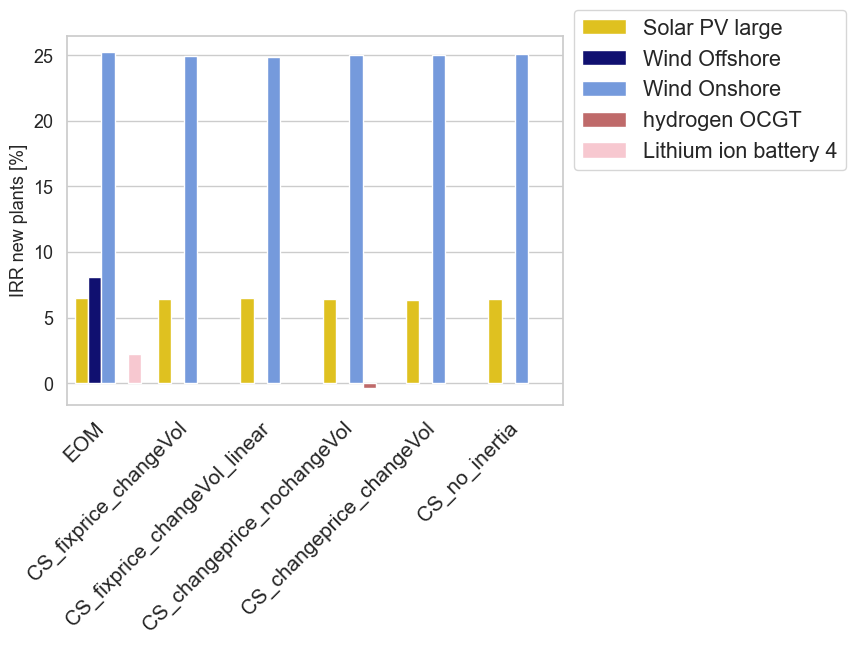

In [151]:
IRRNewPlants_raw = IRRNewPlants_data.loc[["Solar PV large", "Wind Offshore","Wind Onshore", "hydrogen OCGT", "Lithium ion battery 4"]]
IRRNewPlants = IRRNewPlants_raw*100
IRRNewPlants.rename(columns=column_name_mapping, inplace=True)

#IRRNewPlants.rename(index=technology_names, inplace=True)
meltedIRR =  pd.melt(IRRNewPlants.reset_index(), id_vars='index')
sns.barplot(meltedIRR, x="variable", y="value", hue="index")
plt.xticks(rotation=45, size = 15,  ha="right")
# fig, ax = plt.subplots()
# ax = sns.boxplot(x="index", y="value",  hue="variable",
#             data=meltedIRR).set(xlabel='', ylabel='IRR  %')
# sns.stripplot(x="index", y="value",  hue="variable",
#             data=meltedIRR, dodge=True , legend = False).set(xlabel='', ylabel='')
plt.xlabel('',)
plt.legend( title="", loc='upper left', fontsize='large' ,bbox_to_anchor=(1, 1.1))
plt.ylabel('IRR new plants [%]', fontsize='medium') 
plt.savefig(path_to_plots + '/' + 'IRRNewPlants'+ name  + '.png', bbox_inches='tight', dpi=300)


In [152]:
colors = [technology_colors[tech] for tech in lifetimeExtension.index.values]

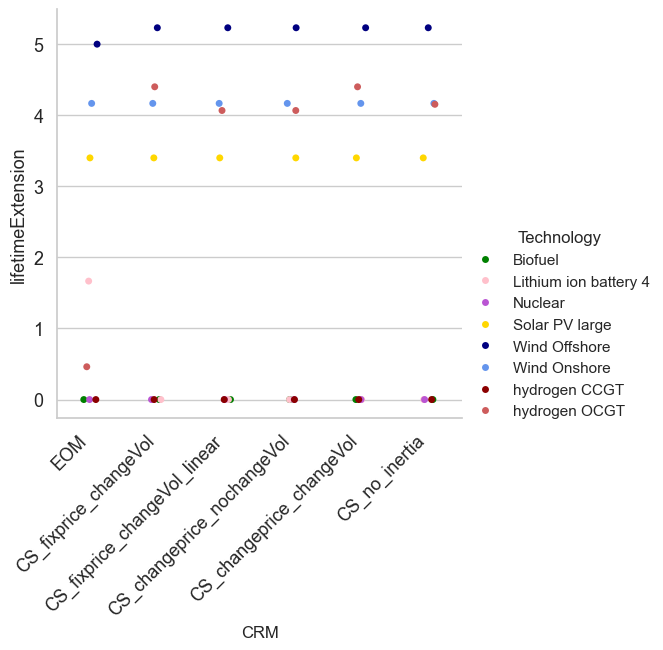

In [153]:
meltedlifetimeExtension =  pd.melt(lifetimeExtension.reset_index(), id_vars='Technology')
meltedlifetimeExtension.rename(columns={"variable":"CRM", "value": "years"}, inplace=True)
sns.set_palette(sns.color_palette(colors))
sns.catplot(data=meltedlifetimeExtension, x="CRM" ,y = "years", hue="Technology")
plt.xticks(rotation=45, ha="right") 
plt.ylabel('lifetimeExtension', fontsize='medium') 
plt.savefig(path_to_plots + '/' + 'lifetimeExtension'+ name  + '.png', bbox_inches='tight', dpi=300)

In [154]:
colors2 =[]
for t in totalyearlyIRRs.technology: 
    colors2.append(technology_colors[t])

NameError: name 'totalyearlyIRRs' is not defined

In [ ]:
yearlyIRRs = pd.read_excel(path_to_results, sheet_name='yearlyIRRs',  header=[0,1], index_col=0)
totalyearlyIRRs = yearlyIRRs.mean().to_frame().reset_index().reindex()
sns.set_palette(sns.color_palette(colors2))
axes = sns.barplot(totalyearlyIRRs,y =0, x="scenario_name", hue="technology")
sns.move_legend(axes, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('')
plt.xticks(rotation=45, ha="right") 
plt.ylabel('yearly average IRR %', fontsize='medium') 
plt.savefig(path_to_plots + '/' + 'yearlyIRRs'+ name  + '.png', bbox_inches='tight', dpi=300)

In [ ]:
load_mapping = {
    '1': 'subscribed',
    '2': 'unsubscribed',
    '3': 'voluntary',
}
voluntaryENS = pd.read_excel(path_to_results, sheet_name='voluntaryENS',  header=[0,1], index_col=0)
voluntaryENS.rename(columns=load_mapping, inplace=True)

axs1 = sns.catplot( data=pd.melt(voluntaryENS),  y="value", x="technology",hue="scenario_name", kind="box")
[plt.setp(ax.get_xticklabels(), rotation=20, ha="right")for ax in axs1.axes.flat]
plt.xlabel('', fontsize='large')
plt.ylabel('ENS [MWh]', fontsize='large')
plt.tight_layout()
plt.savefig(path_to_plots + '/' + 'unsubscribedENS'+ name  + '.png', bbox_inches='tight', dpi=300)

In [ ]:
load_mapping = {
    '1': 'LS',
    '2': 'LS',
    '3': 'DSR'
}
voluntaryENS = pd.read_excel(path_to_results, sheet_name='voluntaryENS',  header=[0,1], index_col=0)
voluntaryENS.rename(columns=load_mapping, inplace=True)
axs1 = sns.catplot( data=pd.melt(voluntaryENS),  y="value", x="technology",hue="scenario_name", kind="box")
[plt.setp(ax.get_xticklabels(), rotation=20, ha="right")for ax in axs1.axes.flat]
plt.xlabel('', fontsize='large')
plt.ylabel('ENS [MWh]', fontsize='large')
plt.tight_layout()
plt.savefig(path_to_plots + '/' + 'voluntaryENS'+ name  + '.png', bbox_inches='tight', dpi=300)